In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, './download/' )

100.0%


In [2]:
with tarfile.open( './download/cifar10.tgz', 'r:gz') as tar:
    tar.extractall( path='./data' )

In [3]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print( classes )

['test', 'train']
['automobile', 'airplane', 'deer', 'ship', 'dog', 'horse', 'bird', 'frog', 'truck', 'cat']


In [4]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['3448.png', '0159.png', '0319.png', '1830.png', '4675.png']


In [7]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

classes = dataset.classes

img, label = dataset[0]
print(img.shape, label, classes[label])


torch.Size([3, 32, 32]) 0 airplane


Label:  airplane (0)


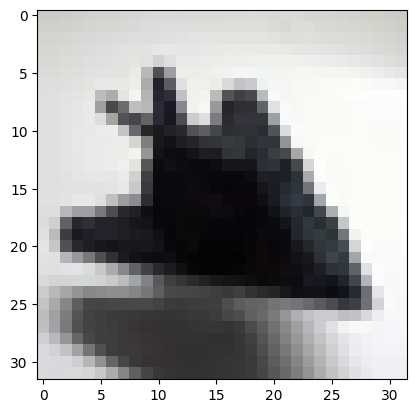

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow( img.permute(1, 2, 0) )

show_example(*dataset[0])

In [14]:
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid

random_seed = 42
torch.manual_seed(random_seed)

val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size]) 

batch_size=128

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

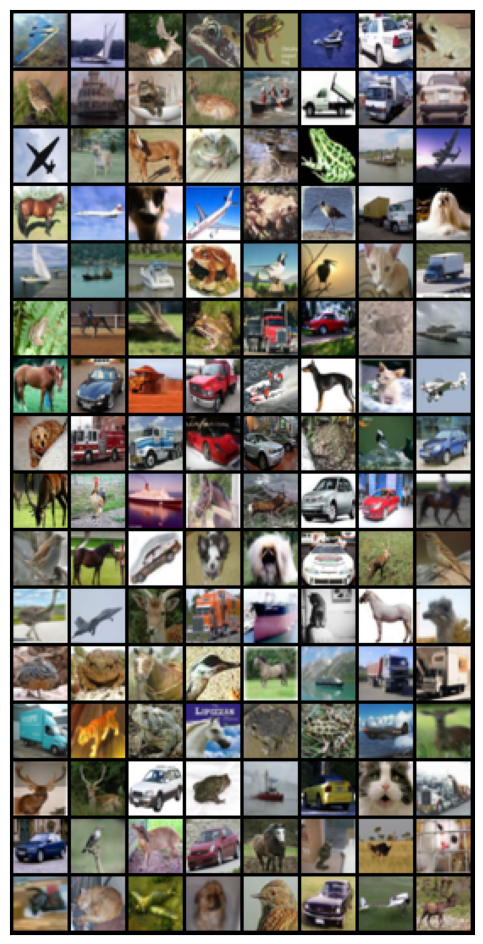

In [17]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break
    pass
pass

show_batch(train_dl)